## Observations and Insights 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.columns
study_results.columns
mouse_metadata.head()
mouse_metadata.dtypes
len(study_results)
mouse_metadata.info()
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [4]:
# Combine the data into a single dataset

combined_study_df = pd.merge(mouse_metadata, study_results,
                                  how='outer', on='Mouse ID')
# Display the data table for preview
combined_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
print(combined_study_df.count())

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_study_df.loc[combined_study_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_study_df = combined_study_df.loc[combined_study_df['Mouse ID'] != 'g989']


In [9]:
# Checking the number of mice in the clean DataFrame.
print(clean_combined_study_df.count())

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avg_tumor = clean_combined_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
print(avg_tumor.head())

median_tumor = clean_combined_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
print(median_tumor.head())

variance_tumor = clean_combined_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
print(variance_tumor.head())

std_tumor = clean_combined_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
print(std_tumor.head())

SEM_tumor = clean_combined_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
print(SEM_tumor.head())

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_combined_study_df.rename(columns = {'Tumor Volume (mm3)':'Tumor_Volume'}, inplace = True)


clean_combined_study_df.groupby(clean_combined_study_df["Drug Regimen"]).Tumor_Volume.agg(["min",
                                               "max",
                                               "sum",
                                               "count",
                                               "sem",
                                               "mean"])

/var/folders/0y/llrshh0d7fdb11813rr9n_pm0000gn/T/ipykernel_36812/869385041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_study_df.rename(columns = {'Tumor Volume (mm3)':'Tumor_Volume'}, inplace = True)


,min,max,sum,count,sem,mean
Drug Regimen,,,,,,
Capomulin,23.343598,48.158209,9355.420462,230,0.329346,40.675741
Ceftamin,45.000000,68.923185,9361.228582,178,0.469821,52.591172
Infubinol,36.321346,72.226731,9413.493529,178,0.492236,52.884795
Ketapril,45.000000,78.567014,10384.299876,188,0.603860,55.235638
Naftisol,45.000000,76.668817,10105.671026,186,0.596466,54.331565
Placebo,45.000000,73.212939,9780.078122,181,0.581331,54.033581
Propriva,45.000000,72.455421,7743.497619,148,0.544332,52.320930
Ramicane,22.050126,47.622816,9169.417875,228,0.320955,40.216745
Stelasyn,45.000000,75.123690,9816.199991,181,0.573111,54.233149


## Bar and Pie Charts

In [12]:
timepoint_df = clean_combined_study_df['Timepoint'].value_counts()
timepoint_df


0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

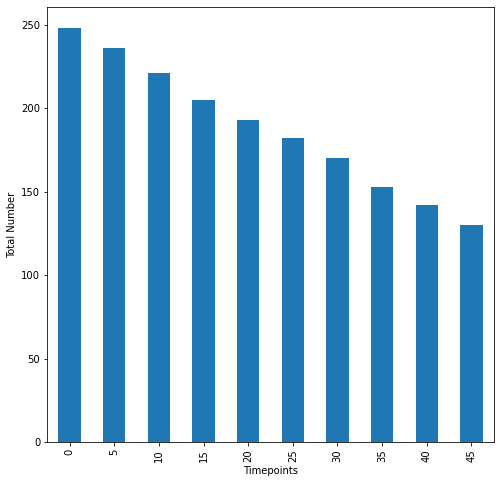

<Figure size 432x288 with 0 Axes>

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create a bar chart based off of the group series from before
timepoint_chart = timepoint_df.plot(kind='bar', figsize=(8,8))

# Set the xlabel and ylabel using class methods
timepoint_chart.set_xlabel("Timepoints")
timepoint_chart.set_ylabel("Total Number")
plt.show()
plt.tight_layout()

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



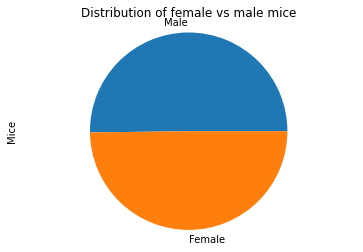

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count = mouse_metadata['Sex'].value_counts()

mice_sex_df = sex_count.plot(kind="pie", y='Sex',  title=('Distribution of female vs male mice'))
mice_sex_df.set_ylabel("Mice")

plt.axis("equal")
plt.show()


([<matplotlib.patches.Wedge at 0x7fb222bbcac0>,
 [Text(-0.7655308193487089, -0.9241009493704108, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327395, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

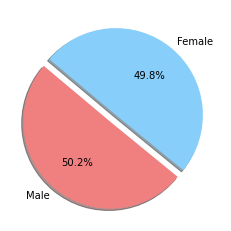

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
# sizes = [220, 95, 80, 100]
sizes = mouse_metadata['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [17]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df = clean_combined_study_df.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_df['max']=max_timepoint_df.index

newdf = max_timepoint_df.to_frame()

new_df = clean_combined_study_df.merge(newdf, on=['Mouse ID'])
print(new_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint_x  \
0        k403     Ramicane  Male          21          16            0   
1        k403     Ramicane  Male          21          16            5   
2        k403     Ramicane  Male          21          16           10   
3        k403     Ramicane  Male          21          16           15   
4        k403     Ramicane  Male          21          16           20   
...       ...          ...   ...         ...         ...          ...   
1875     z969     Naftisol  Male           9          30           25   
1876     z969     Naftisol  Male           9          30           30   
1877     z969     Naftisol  Male           9          30           35   
1878     z969     Naftisol  Male           9          30           40   
1879     z969     Naftisol  Male           9          30           45   

      Tumor_Volume  Metastatic Sites Timepoint_y  
0        45.000000                 0          45  
1        38.825898   

In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

result_df = new_df.loc[new_df['Drug Regimen'].isin(treatments)]
result1_df = result_df.loc[result_df["Timepoint_x"] == result_df["Timepoint_y"]]

result2_df = result1_df[['Drug Regimen','Tumor_Volume', 'Mouse ID']].copy()
result2_df.reset_index(drop=True, inplace=True)
print(result2_df)

# Create empty list to fill with tumor vol data (for plotting)
plotting_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = result1_df["Tumor_Volume"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume  is: {upperq}")
print(f"The interquartile range of tumor volume  is: {iqr}")
print(f"The the median of tumor volume  is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # for treatment in treatments:
    # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

   Drug Regimen  Tumor_Volume Mouse ID
0      Ramicane     22.050126     k403
1     Capomulin     23.343598     s185
2     Capomulin     28.484033     x401
3     Capomulin     28.430964     m601
4      Ramicane     29.128472     g791
..          ...           ...      ...
95     Ceftamin     61.386660     x822
96    Infubinol     67.685569     y163
97     Ceftamin     68.594745     y769
98     Ceftamin     64.729837     y865
99    Infubinol     62.754451     z581

[100 rows x 3 columns]
The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume  is: 59.930261755
The interquartile range of tumor volume  is: 22.742517952499995
The the median of tumor volume  is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


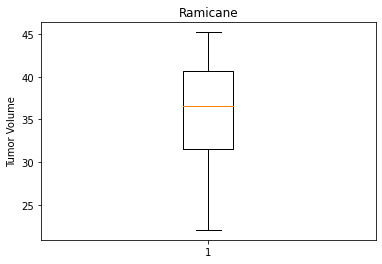

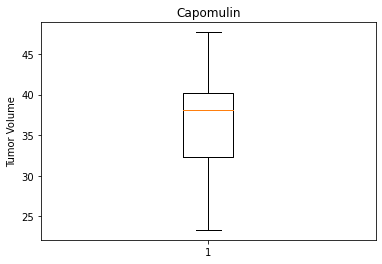

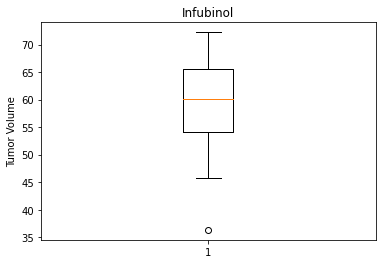

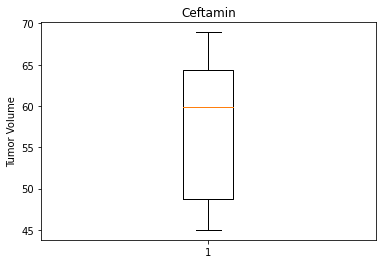

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug = result2_df.loc[result2_df['Drug Regimen'] == 'Ramicane']
Ramicane = drug['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Ramicane)
plt.show()

drug = result2_df.loc[result2_df['Drug Regimen'] == 'Capomulin']
Capomulin = drug['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Capomulin)
plt.show()


drug = result2_df.loc[result2_df['Drug Regimen'] == 'Infubinol']
Infubinol = drug['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Infubinol)
plt.show()

drug = result2_df.loc[result2_df['Drug Regimen'] == 'Ceftamin']
Ceftamin = drug['Tumor_Volume']

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Ceftamin)
plt.show()


## Line and Scatter Plots

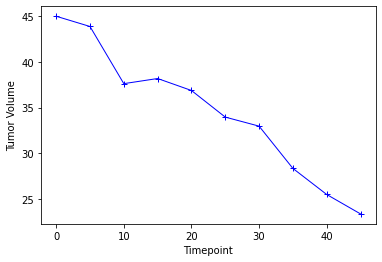

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean_combined_study_df

line1_df = clean_combined_study_df.loc[clean_combined_study_df['Drug Regimen'] == 'Capomulin']
line2_df = clean_combined_study_df.loc[clean_combined_study_df['Mouse ID'] == 's185']
x_axis = line2_df[['Timepoint']]
tumor_size = line2_df[['Tumor_Volume']]
col_list = x_axis["Timepoint"].values.tolist()
col_list1 = tumor_size["Tumor_Volume"].values.tolist()


a_mouse, = plt.plot(col_list, col_list1, marker="+",color="blue", linewidth=1, label="Tumor Volume")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

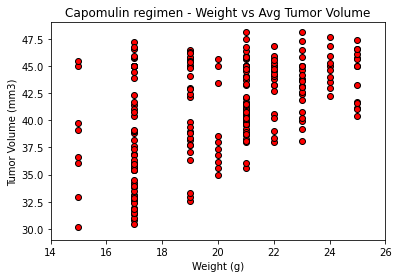

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(line1_df["Weight (g)"], line1_df["Tumor_Volume"], marker="o", facecolors="red", edgecolors="black")

plt.ylim(29,49)
plt.xlim(14,26)

plt.title("Capomulin regimen - Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The r-squared is: 0.27636002234559154


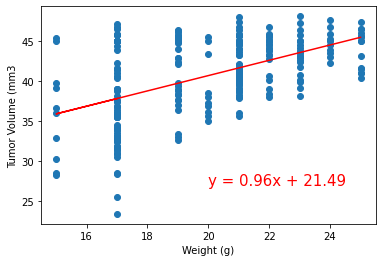

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = line1_df["Weight (g)"]
y_values = line1_df["Tumor_Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,27),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3')
print(f"The r-squared is: {rvalue**2}")
plt.show()
